In [ ]:
!pip install prophet

In [ ]:
import pandas as pd
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/dataset_1.csv')
df.dropna(inplace= True)
df.reset_index(drop=True, inplace=True)

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df = df[(df['item_id'] == 1452) & (df['store_id'] == 0) & (df['state_id'] == 0)]
len(df)

1969

In [ ]:
df1 = df[df['d_value'] == -1]
df = df[df['d_value'] != -1]

In [ ]:
train_ratio = 0.8
test_ratio = 0.2

In [ ]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
train_size = int(train_ratio * len(df))
test_size = len(df) - train_size

In [ ]:
df_train = df.head(train_size)
df_test = df.tail(test_size)

In [ ]:
print(df_train.head())
print(df_train.tail())

   item_id  store_id  state_id  sell_price       date  d_value
0     1452         0         0        0.72 2012-12-29     13.0
1     1452         0         0        0.72 2012-09-17      2.0
2     1452         0         0        0.72 2013-09-21      5.0
3     1452         0         0        0.70 2016-03-15     15.0
4     1452         0         0        0.68 2011-06-25     17.0
      item_id  store_id  state_id  sell_price       date  d_value
1547     1452         0         0        0.70 2015-05-02      3.0
1548     1452         0         0        0.72 2013-05-03      1.0
1549     1452         0         0        0.70 2016-04-27      2.0
1550     1452         0         0        0.72 2013-01-08      0.0
1551     1452         0         0        0.72 2012-09-19      6.0


In [ ]:
print(df_test.head())
print(df_test.tail())

      item_id  store_id  state_id  sell_price       date  d_value
1552     1452         0         0        0.70 2016-02-27      2.0
1553     1452         0         0        0.72 2011-03-29      1.0
1554     1452         0         0        0.70 2014-04-22     12.0
1555     1452         0         0        0.70 2015-09-18      6.0
1556     1452         0         0        0.72 2012-12-04      1.0
      item_id  store_id  state_id  sell_price       date  d_value
1936     1452         0         0        0.70 2011-09-11     14.0
1937     1452         0         0        0.72 2012-02-22      3.0
1938     1452         0         0        0.70 2015-11-20      3.0
1939     1452         0         0        0.72 2012-08-05      3.0
1940     1452         0         0        0.70 2011-09-07      3.0


In [ ]:
df_train.dtypes

item_id                int64
store_id               int64
state_id               int64
sell_price           float64
date          datetime64[ns]
d_value              float64
dtype: object

In [ ]:
df_test.dtypes

item_id                int64
store_id               int64
state_id               int64
sell_price           float64
date          datetime64[ns]
d_value              float64
dtype: object

<Axes: >

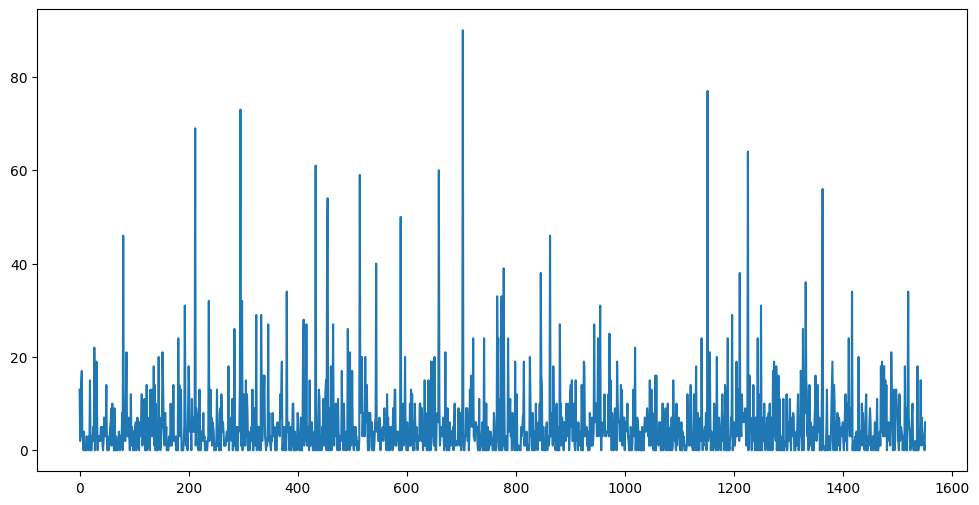

In [ ]:
df_train.d_value.plot(figsize=(12,6))

In [ ]:
df_train.rename(columns={'d_value':'y','date':'ds'},inplace=True)
df_test.rename(columns={'d_value':'y','date':'ds'},inplace=True)

<ipython-input-46-8c83a63ed3f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns={'d_value':'y','date':'ds'},inplace=True)
<ipython-input-46-8c83a63ed3f0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.rename(columns={'d_value':'y','date':'ds'},inplace=True)


In [ ]:
df_test.head()

,item_id,store_id,state_id,sell_price,ds,y
1552,1452,0,0,0.70,2016-02-27,2.0
1553,1452,0,0,0.72,2011-03-29,1.0
1554,1452,0,0,0.70,2014-04-22,12.0
1555,1452,0,0,0.70,2015-09-18,6.0
1556,1452,0,0,0.72,2012-12-04,1.0


In [ ]:
model = Prophet(interval_width = 0.9)
model.add_regressor('sell_price',standardize = False)
model.add_regressor('store_id',standardize = False)
model.add_regressor('state_id',standardize = False)
model.add_regressor('item_id',standardize = False)
model.fit(df_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptr2wqdxt/o_w9_f9f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptr2wqdxt/4jffj62p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93368', 'data', 'file=/tmp/tmptr2wqdxt/o_w9_f9f.json', 'init=/tmp/tmptr2wqdxt/4jffj62p.json', 'output', 'file=/tmp/tmptr2wqdxt/prophet_modeltfyx1evg/prophet_model-20231218180033.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:00:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:00:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
model.params

OrderedDict([('lp__', array([[2973.06]])),
             ('k', array([[0.033437]])),
             ('m', array([[0.055552]])),
             ('delta',
              array([[-0.0145312 , -0.014095  , -0.0131923 , -0.0120917 , -0.0106961 ,
                      -0.00905678, -0.00749772, -0.00571479, -0.00377473, -0.00165076,
                       0.00014788,  0.00158917,  0.00372195,  0.00584031,  0.00779729,
                       0.00944615,  0.0112109 ,  0.0130637 ,  0.0148329 ,  0.0163747 ,
                       0.0180728 ,  0.0196524 ,  0.0211712 ,  0.0226243 ,  0.0241518 ]])),
             ('sigma_obs', array([[0.0890844]])),
             ('beta',
              array([[-2.85330e-03, -1.13378e-02, -5.86058e-03, -2.53862e-04,
                       2.94051e-03, -4.47341e-03, -2.12637e-03,  2.08855e-03,
                      -3.34151e-03,  4.88698e-03, -3.52516e-03,  4.27024e-04,
                       2.86231e-04,  1.55054e-03,  3.01404e-03,  1.26461e-03,
                      -3.1159

In [ ]:
df_test_copy = df_test[['sell_price','store_id','item_id','ds','state_id']]
print(df_test_copy.head())


      sell_price  store_id  item_id         ds  state_id
1552        0.70         0     1452 2016-02-27         0
1553        0.72         0     1452 2011-03-29         0
1554        0.70         0     1452 2014-04-22         0
1555        0.70         0     1452 2015-09-18         0
1556        0.72         0     1452 2012-12-04         0


In [ ]:
forecast1 = model.predict(df_test_copy)
forecast1 = forecast1[['ds','yhat']]
forecast1.head()

,ds,yhat
0,2011-01-31,2.463841
1,2011-02-03,3.688082
2,2011-02-15,5.611282
3,2011-02-26,7.286783
4,2011-03-01,6.545157


In [ ]:
final_df = df_test.merge(forecast1,on='ds')
final_df

,item_id,store_id,state_id,sell_price,ds,y,yhat
0,1452,0,0,0.70,2016-02-27,2.0,8.311127
1,1452,0,0,0.72,2011-03-29,1.0,5.775293
2,1452,0,0,0.70,2014-04-22,12.0,4.809444
3,1452,0,0,0.70,2015-09-18,6.0,5.057784
4,1452,0,0,0.72,2012-12-04,1.0,4.960411
...,...,...,...,...,...,...,...
384,1452,0,0,0.70,2011-09-11,14.0,6.315921
385,1452,0,0,0.72,2012-02-22,3.0,6.023851
386,1452,0,0,0.70,2015-11-20,3.0,5.012985
387,1452,0,0,0.72,2012-08-05,3.0,6.712893


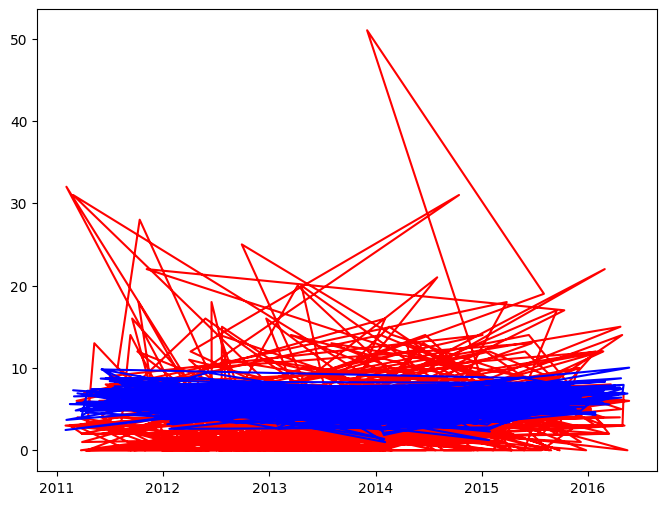

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(final_df['ds'],final_df['y'],color='red',label='actual')
plt.plot(final_df['ds'],final_df['yhat'],color='blue',label='forecast')

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(final_df['y'],final_df['yhat']))
print(rmse)

5.978533627146887
